In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import preliz as pz
import arviz as az

In [2]:
# setting some plotting options 
sns.set_style('ticks')
plt.style.use('dark_background')

sns.set_context("notebook")

%config InlineBackend.figure_format = 'retina'

### Introduction 
This notebook provides examples and working code for the first chapter of BAP3. These elements seemed important to me personally and should not be percieved as an exhaustive account of the textbook. I merely thought them to be crucial for my understanding of the material described in the text. I am going to attempt to solve the code exercises here though. 

### Chapter summary 
This chapter focuses on the initial probability theoretic lessons and analysis workflows to establish working habbits for bayesian (re-)thinking professionally. Python package `preliz` is introduced in this section. This module facilitates prior distribution illicitaion and visualization which is cool!

<Axes: >

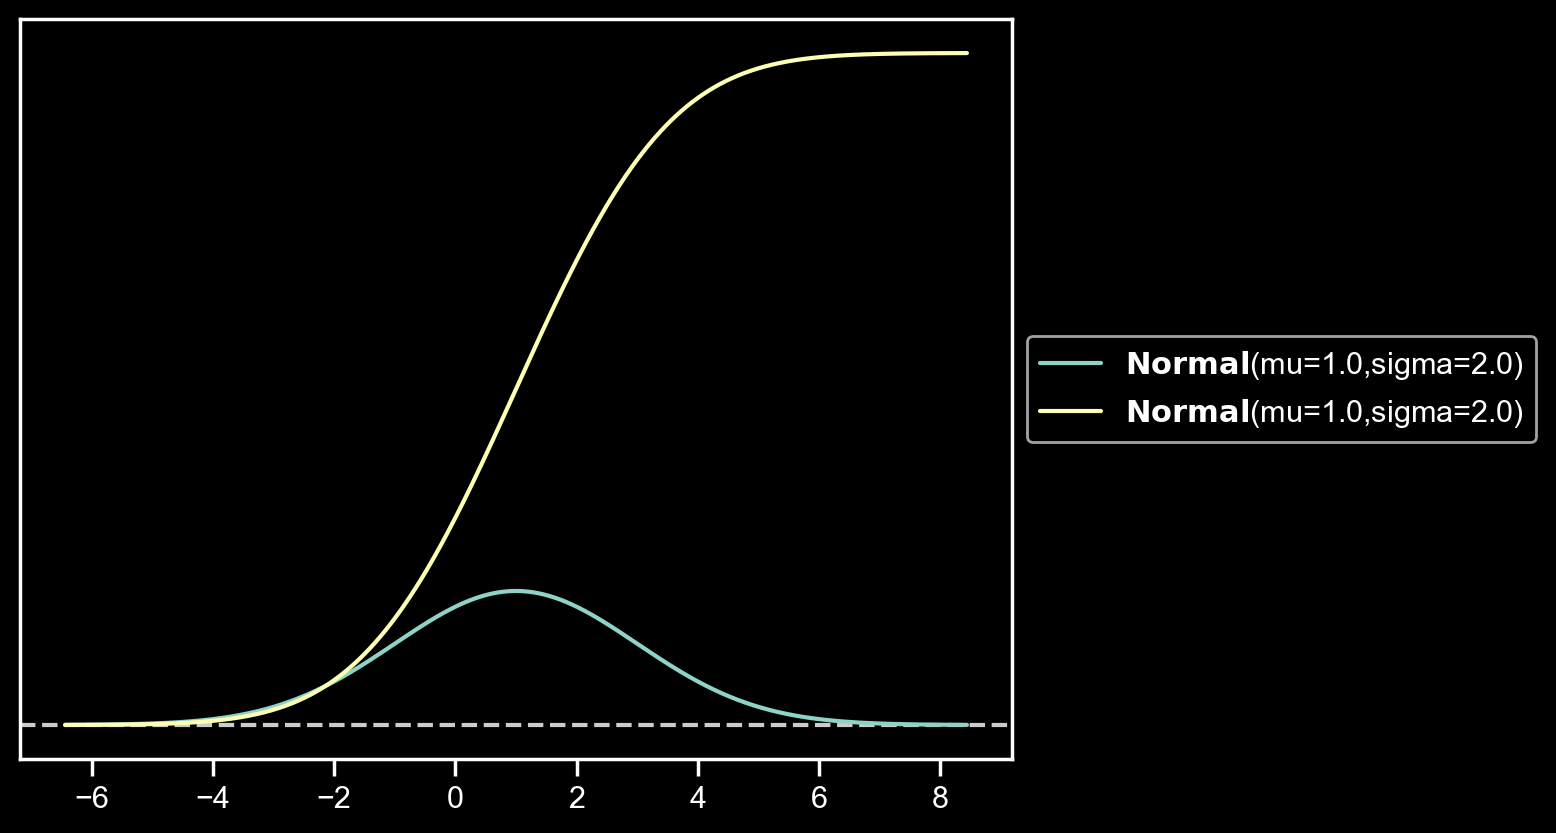

In [3]:
α = 1
β = 2

# this will define a beta distribution
X = pz.Normal(α, β)
x = X.rvs(1000)

# X.plot_interactive()
X.plot_pdf()
X.plot_cdf()

array([<Axes: title={'center': 'θ'}>, <Axes: title={'center': 'γ'}>],
      dtype=object)

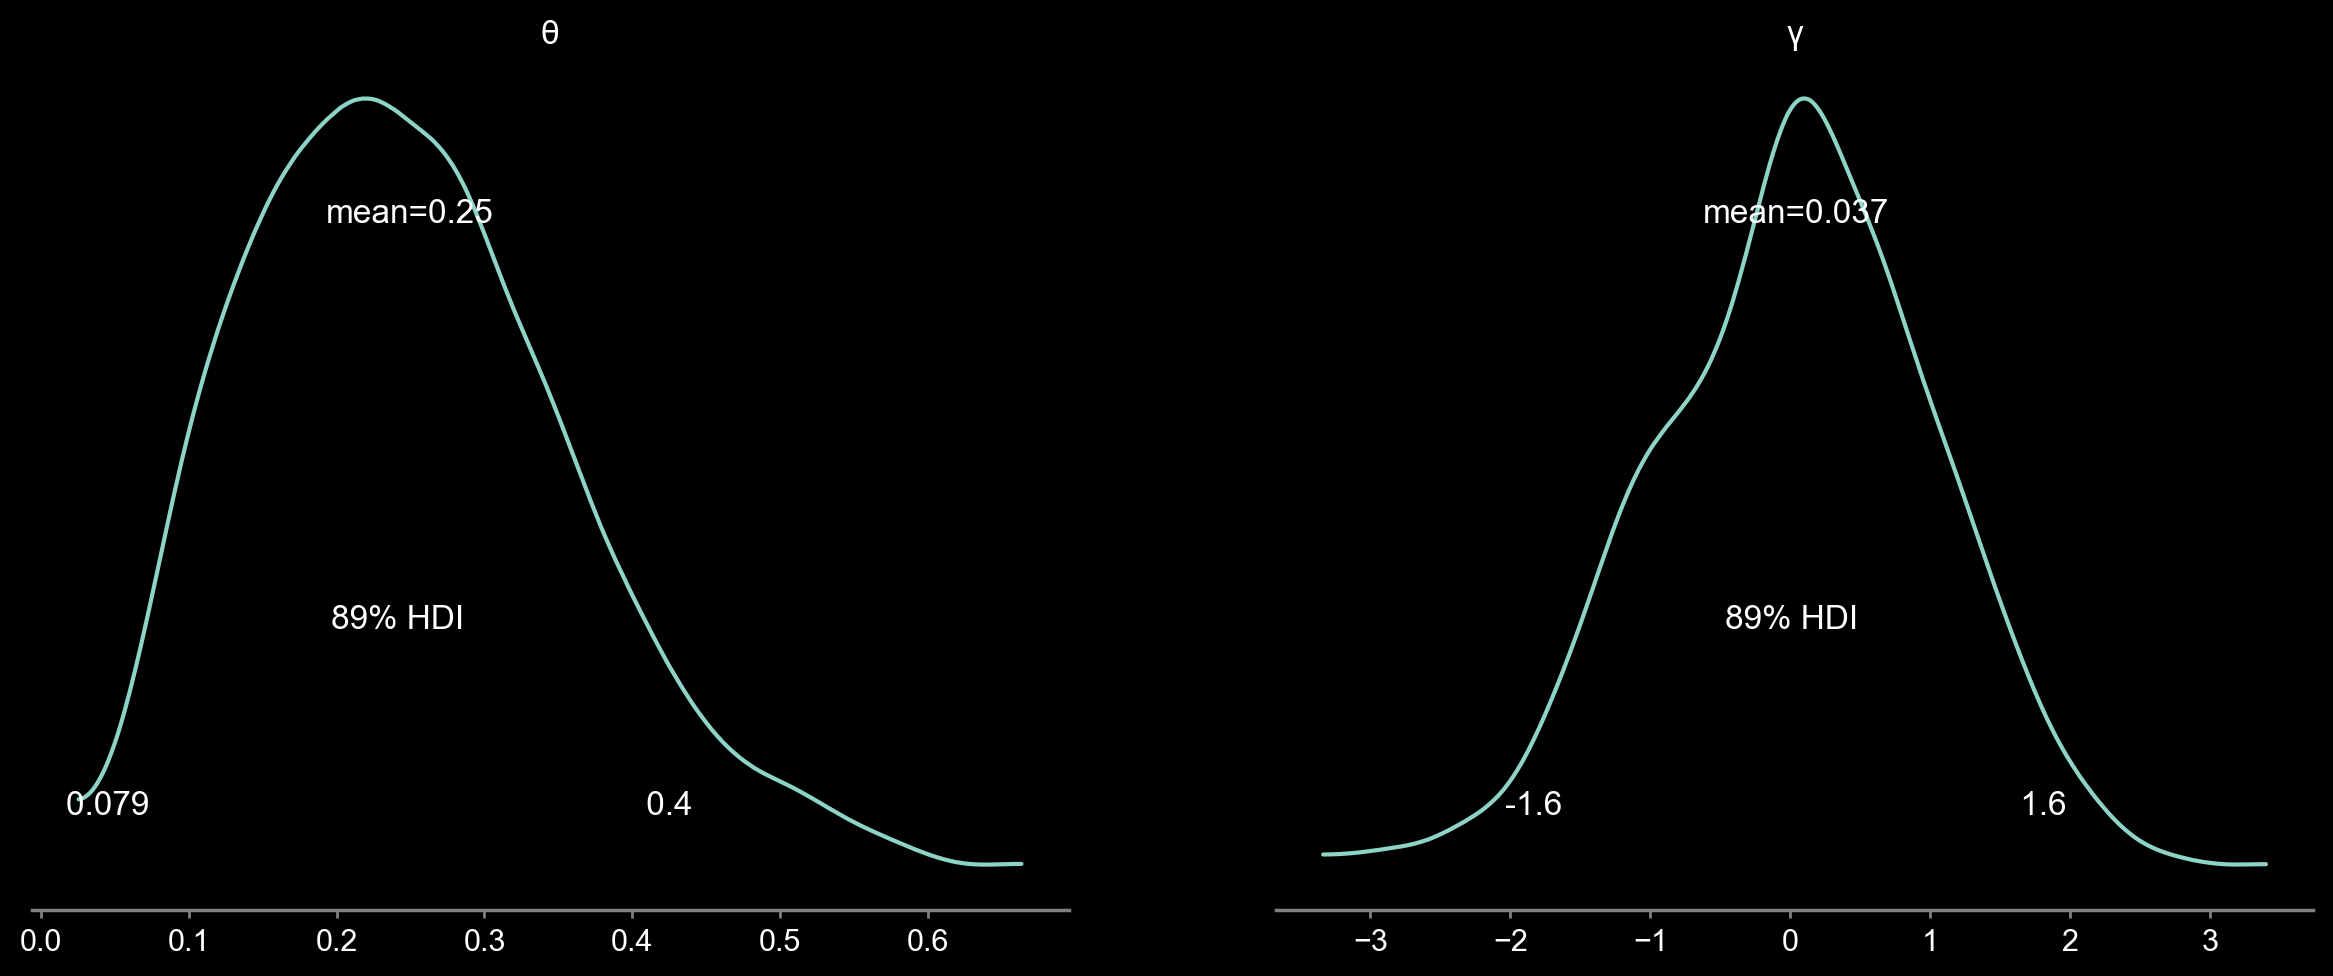

In [4]:
np.random.seed(1)
az.plot_posterior(
    {"θ": pz.Beta(4, 12).rvs(1000), "γ": pz.Normal(0, 1).rvs(1000)},
    hdi_prob=0.89,
)

### Exercises

#### 1.1 
There are three types of jelly beans in a jar. I pick one. Then -- 
* The sample space of outcomes is set $\textit{S = \{``s", ``s", ``b", ``c"\}}$
* A: jelly bean drawn is "s", B: jelly bean drawn is not "c". Then P(A) = 0.5 and P(B) = 0.75
* Mutually exclusive means that A and B cannot occur simultaneously. However, when a jelly bean is not cinnamon, then 50% of the time it is likeliy to be strawberry, which is event B. Thus A and B are not mutually exclusive.

In [5]:
# 1.2
# PRobability of A given S
def P(S, E, prob_dist):
    if set(E).issubset(set(S)):
        return np.sum([prob_dist[e] for e in E])
    else:
        return 0


s = {"s", "s", "b", "c"}
a = {"s"}
b = {"s", "b"}

a_prob_dist = {"s": 0.5, "b": 0.25, "c": 0.25}
b_prob_dist = {"s": 0.5, "b": 0.25}

P_A = P(s, a, a_prob_dist)
P_B = P(s, b, b_prob_dist)

In [6]:
P_A, P_B

(0.5, 0.75)

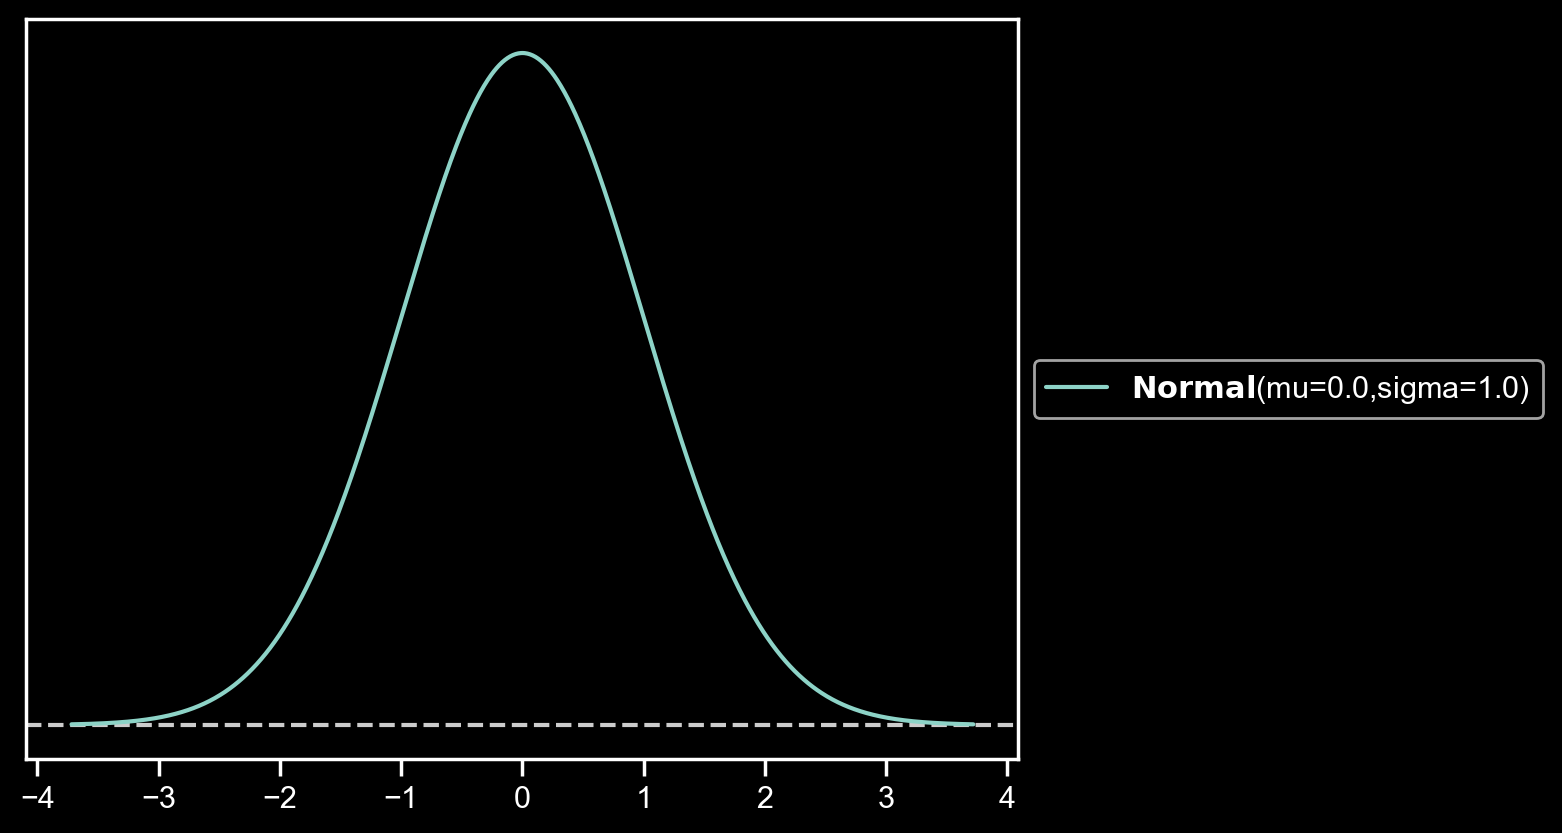

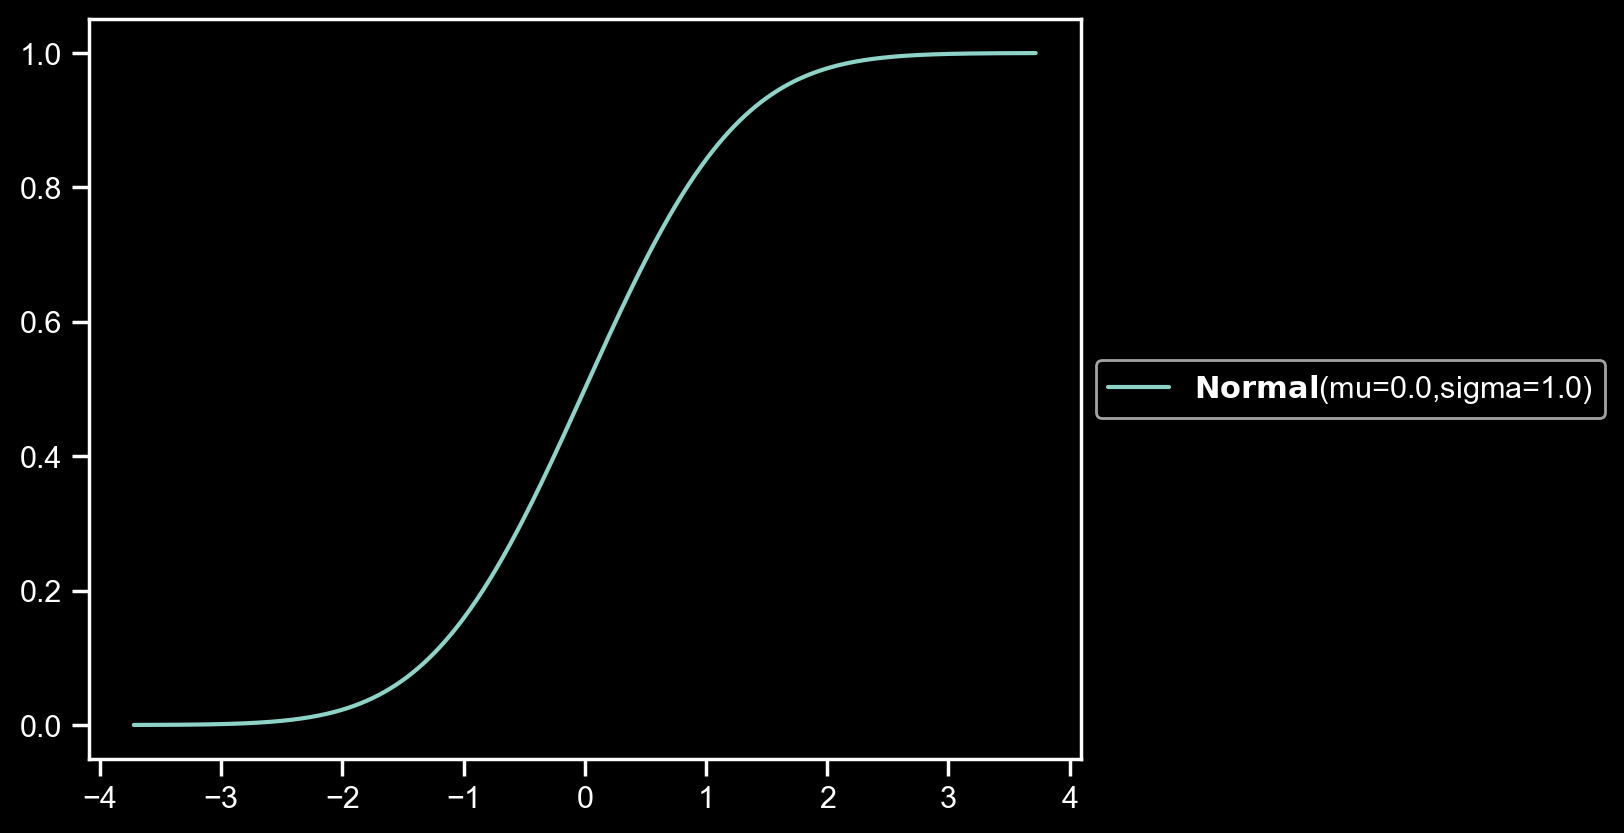

interactive(children=(FloatSlider(value=0.0, description='mu (-inf, inf)', max=10.0, min=-10.0, style=SliderSt…

In [7]:
# 1.3 Aso fun with defining a useless function ...
def explore_distn(dis, *args, preliz_method):
    # use preliz to create a distribution
    distn = dis(*args)
    # d something
    return getattr(distn, preliz_method)()


explore_distn(pz.Normal, 0, 1, preliz_method="plot_pdf")
plt.show()
explore_distn(pz.Normal, 0, 1, preliz_method="plot_cdf")

explore_distn(pz.Normal, 0, 1, preliz_method="plot_interactive")

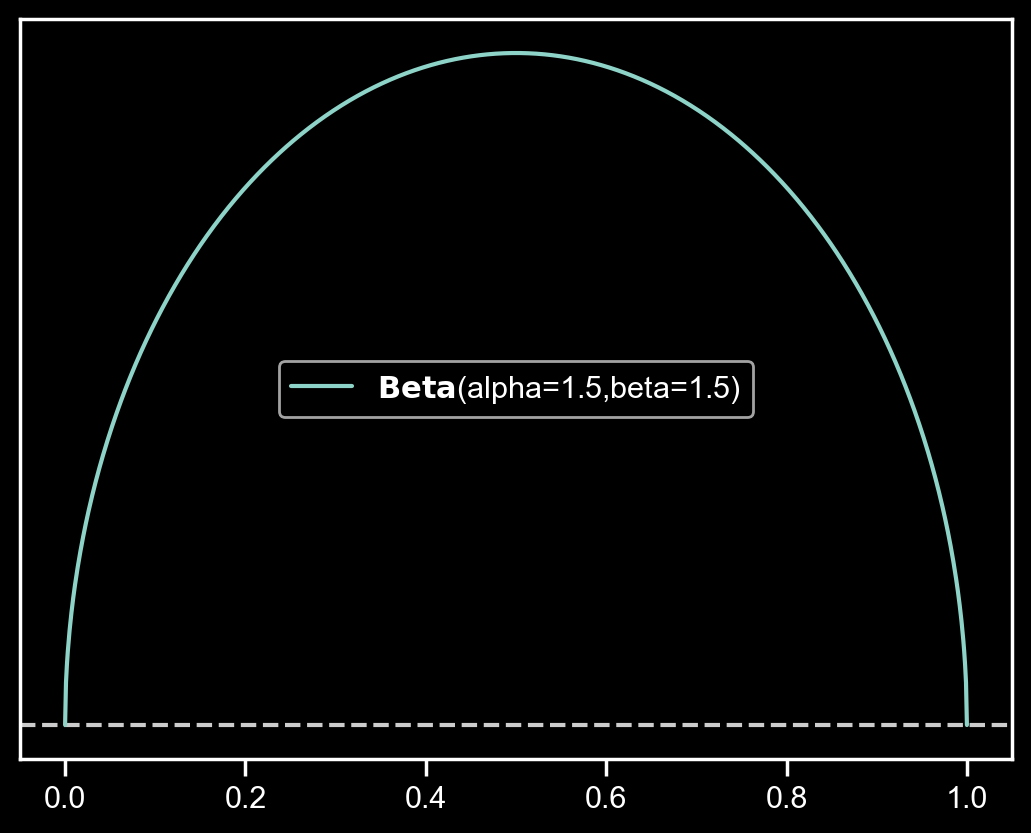

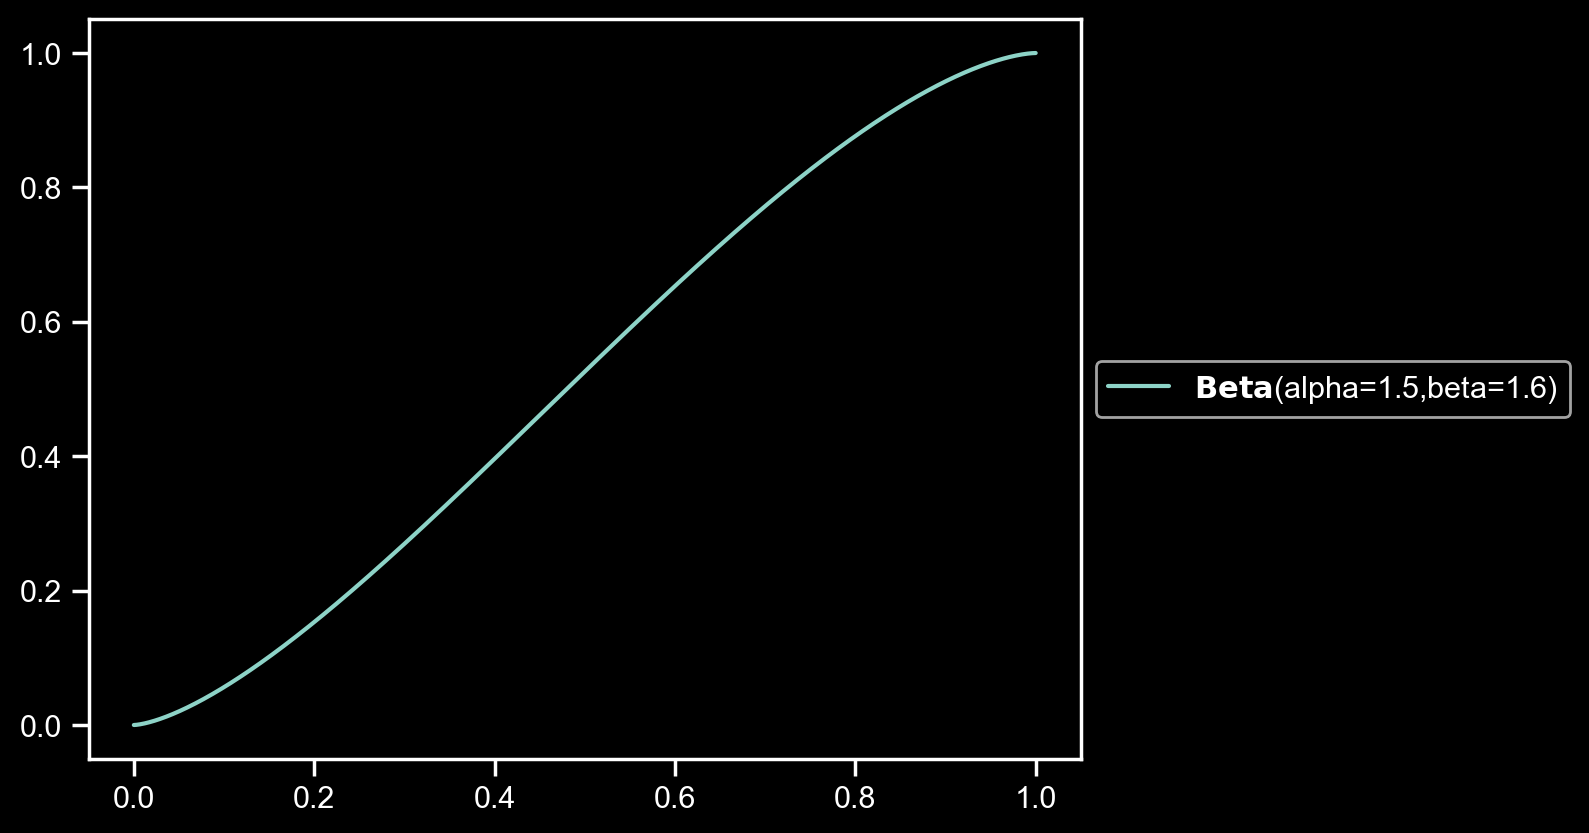

interactive(children=(FloatSlider(value=1.5, description='alpha (0, inf)', max=11.0, min=2.220446049250313e-16…

In [8]:
explore_distn(pz.Beta, 1.5, 1.5, preliz_method="plot_pdf")
plt.legend(loc=0)
plt.show()
explore_distn(pz.Beta, 1.5, 1.6, preliz_method="plot_cdf")

explore_distn(pz.Beta, 1.5, 1.6, preliz_method="plot_interactive")

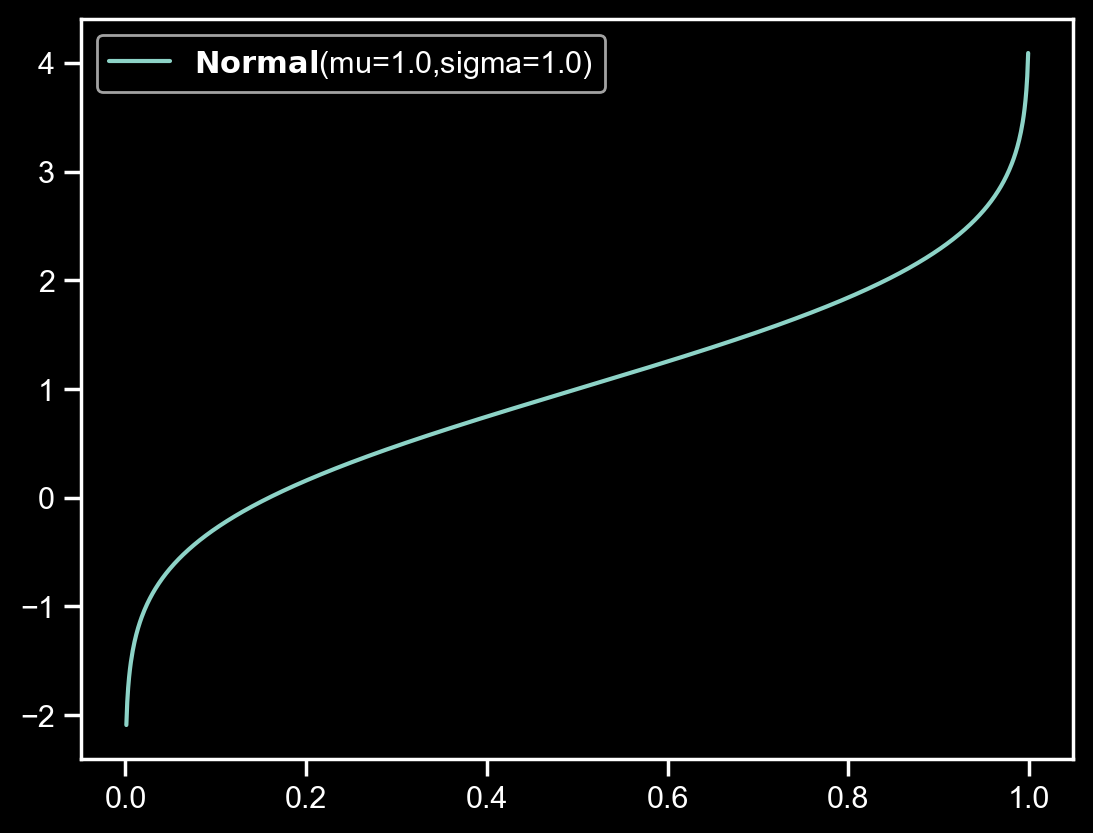

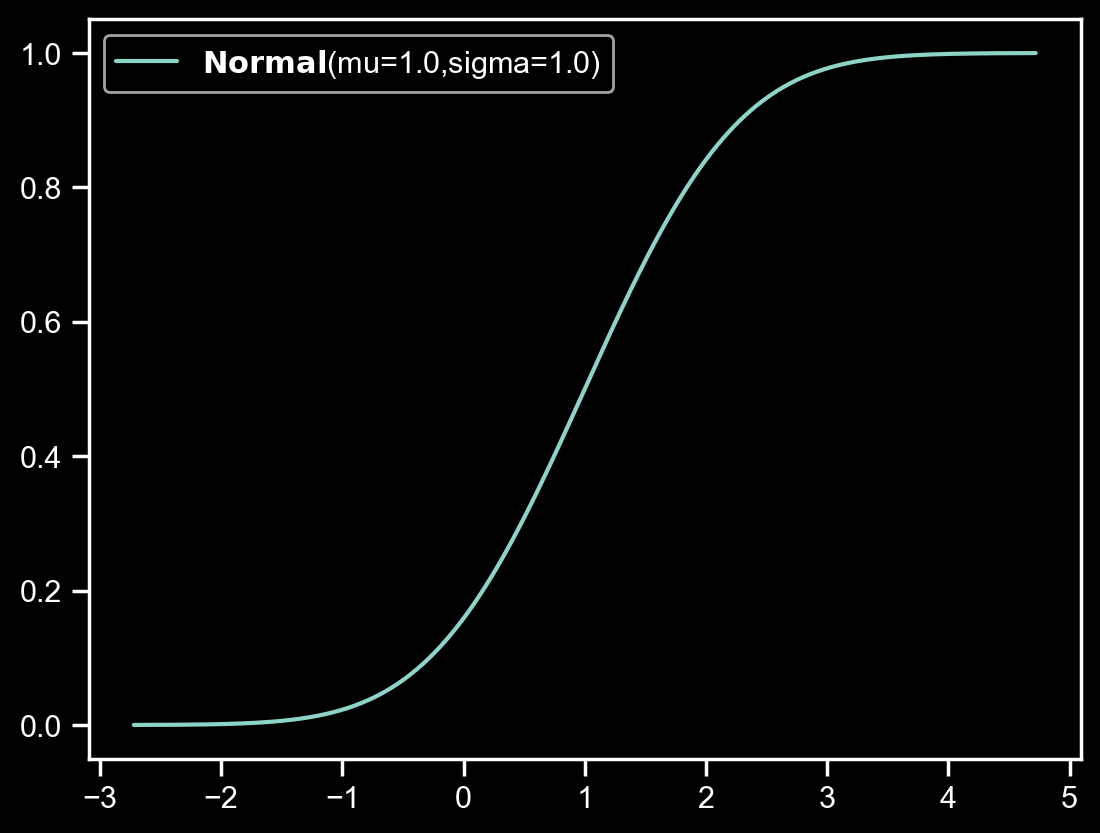

In [9]:
# this is the equilvalent to qnorm and pnorm in R
# it is cool that we can automatically plot things in Python

pz.Normal(1, 1).plot_ppf()
plt.legend(loc=0)
plt.show()

pz.Normal(1, 1).plot_cdf()
plt.legend(loc=0)
plt.show()

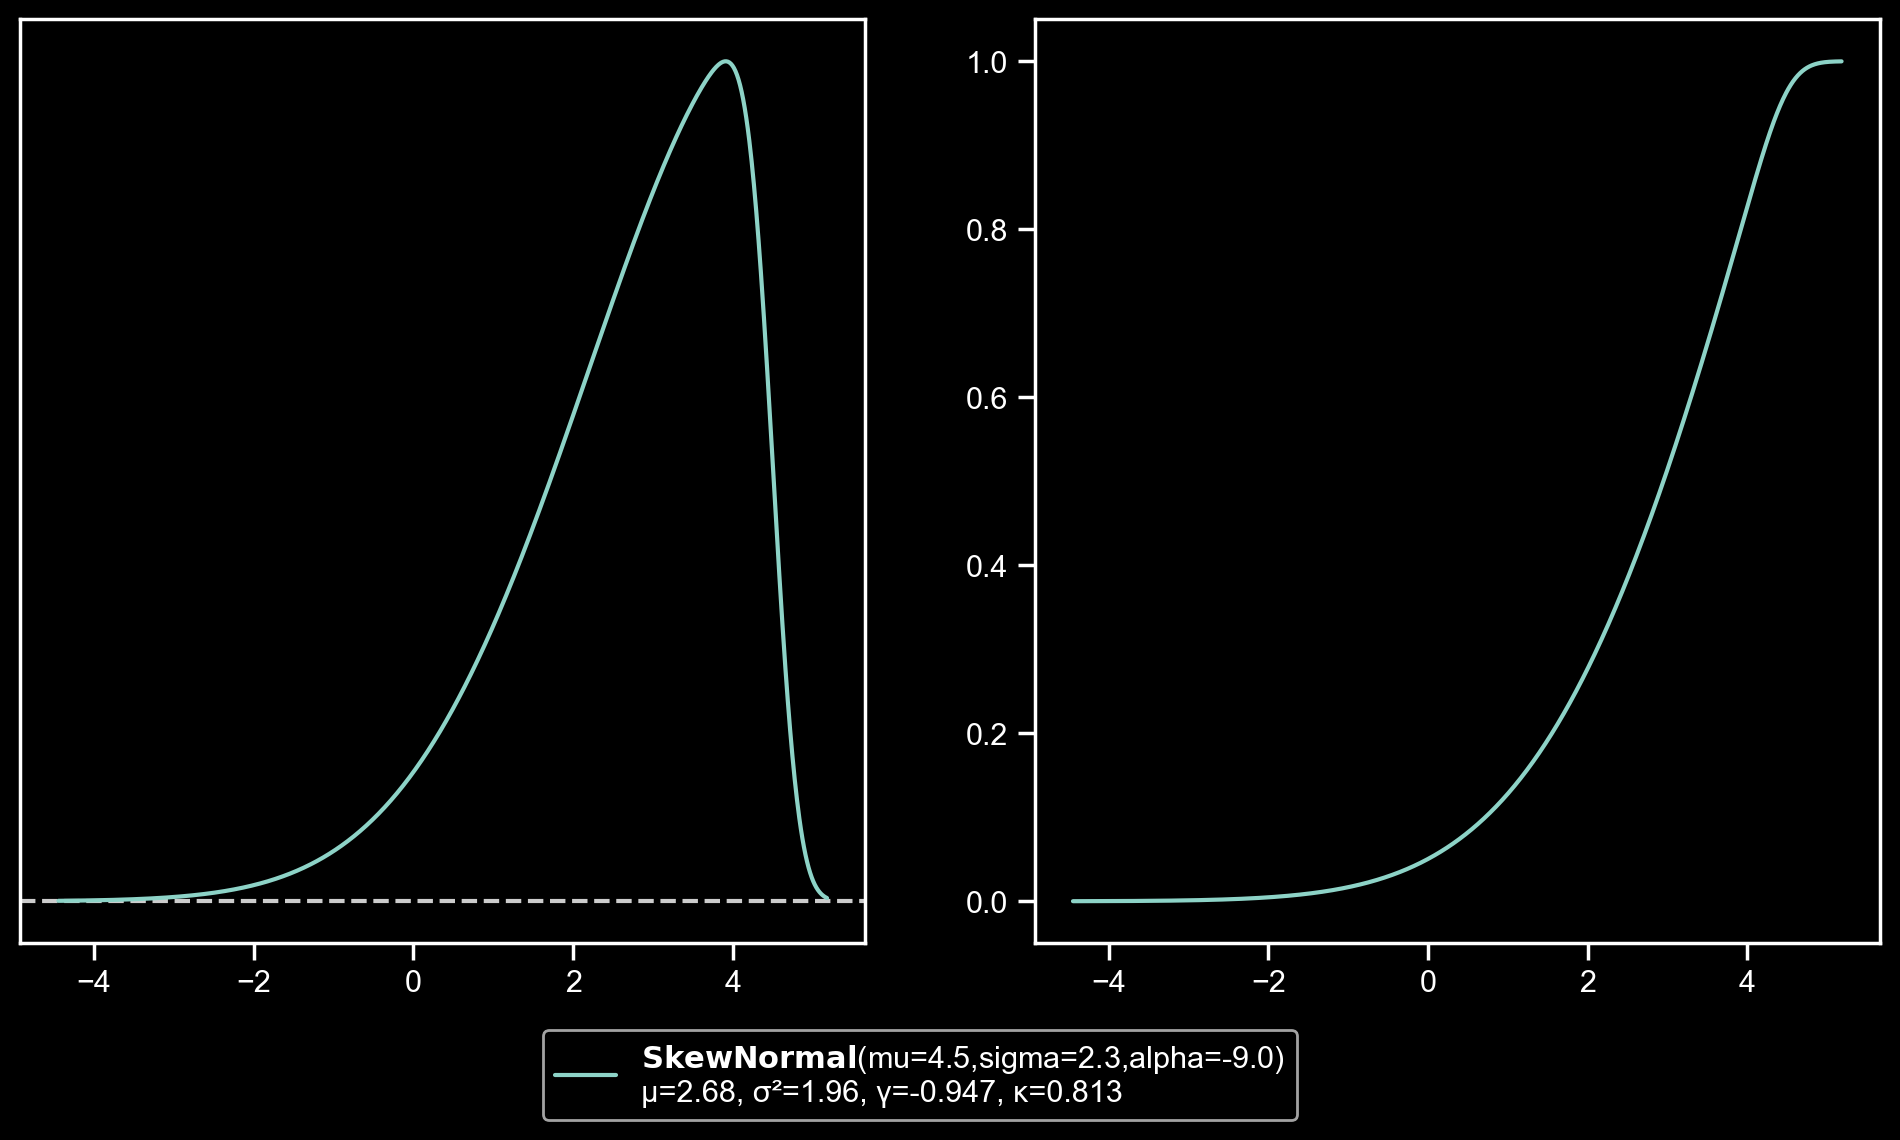

In [10]:
sk_norm = pz.SkewNormal(4.5, 2.3, -9)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
sk_norm.plot_pdf(ax=axs[0], moments=["m", "v", "s", "k"])
sk_norm.plot_cdf(ax=axs[1], moments=["m", "v", "s", "k"])

# Collect legend and place it at the bottom of the plot in the center
# Remove the default legend
axs[0].get_legend().remove()
axs[1].get_legend().remove()

# Collect legend and place it at the bottom of the plot in the center
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", ncol=4, bbox_to_anchor=(0.5, -0.05))
plt.show()

In [11]:
# true values of the forst two moments
true_moments = sk_norm.rv_frozen.stats("mvsk")
stat_lab = ["Mean", "Variance", "Skewness", "Kurtosis"]

for i in range(4):
    print(f" True {stat_lab[i]}: {np.round(true_moments[i], 2)}")

 True Mean: 2.68
 True Variance: 1.96
 True Skewness: -0.95
 True Kurtosis: 0.81


/var/folders/hh/h4xmxbls6sb90qzd46r5fqdc0000gn/T/ipykernel_4459/2604262615.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k^" (-> color='k'). The keyword argument will take precedence.
  axs[0].plot(true_moments[0], 0, "k^", markersize=10, color="white")
/var/folders/hh/h4xmxbls6sb90qzd46r5fqdc0000gn/T/ipykernel_4459/2604262615.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k^" (-> color='k'). The keyword argument will take precedence.
  axs[1].plot(true_moments[1], 0, "k^", markersize=10, color="white")
/var/folders/hh/h4xmxbls6sb90qzd46r5fqdc0000gn/T/ipykernel_4459/2604262615.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k^" (-> color='k'). The keyword argument will take precedence.
  axs[2].plot(true_moments[2], 0, "k^", markersize=10, color="white")
/var/folders/hh/h4xmxbls6sb90qzd46r5fqdc0000gn/T/ipykernel_4459/260426261

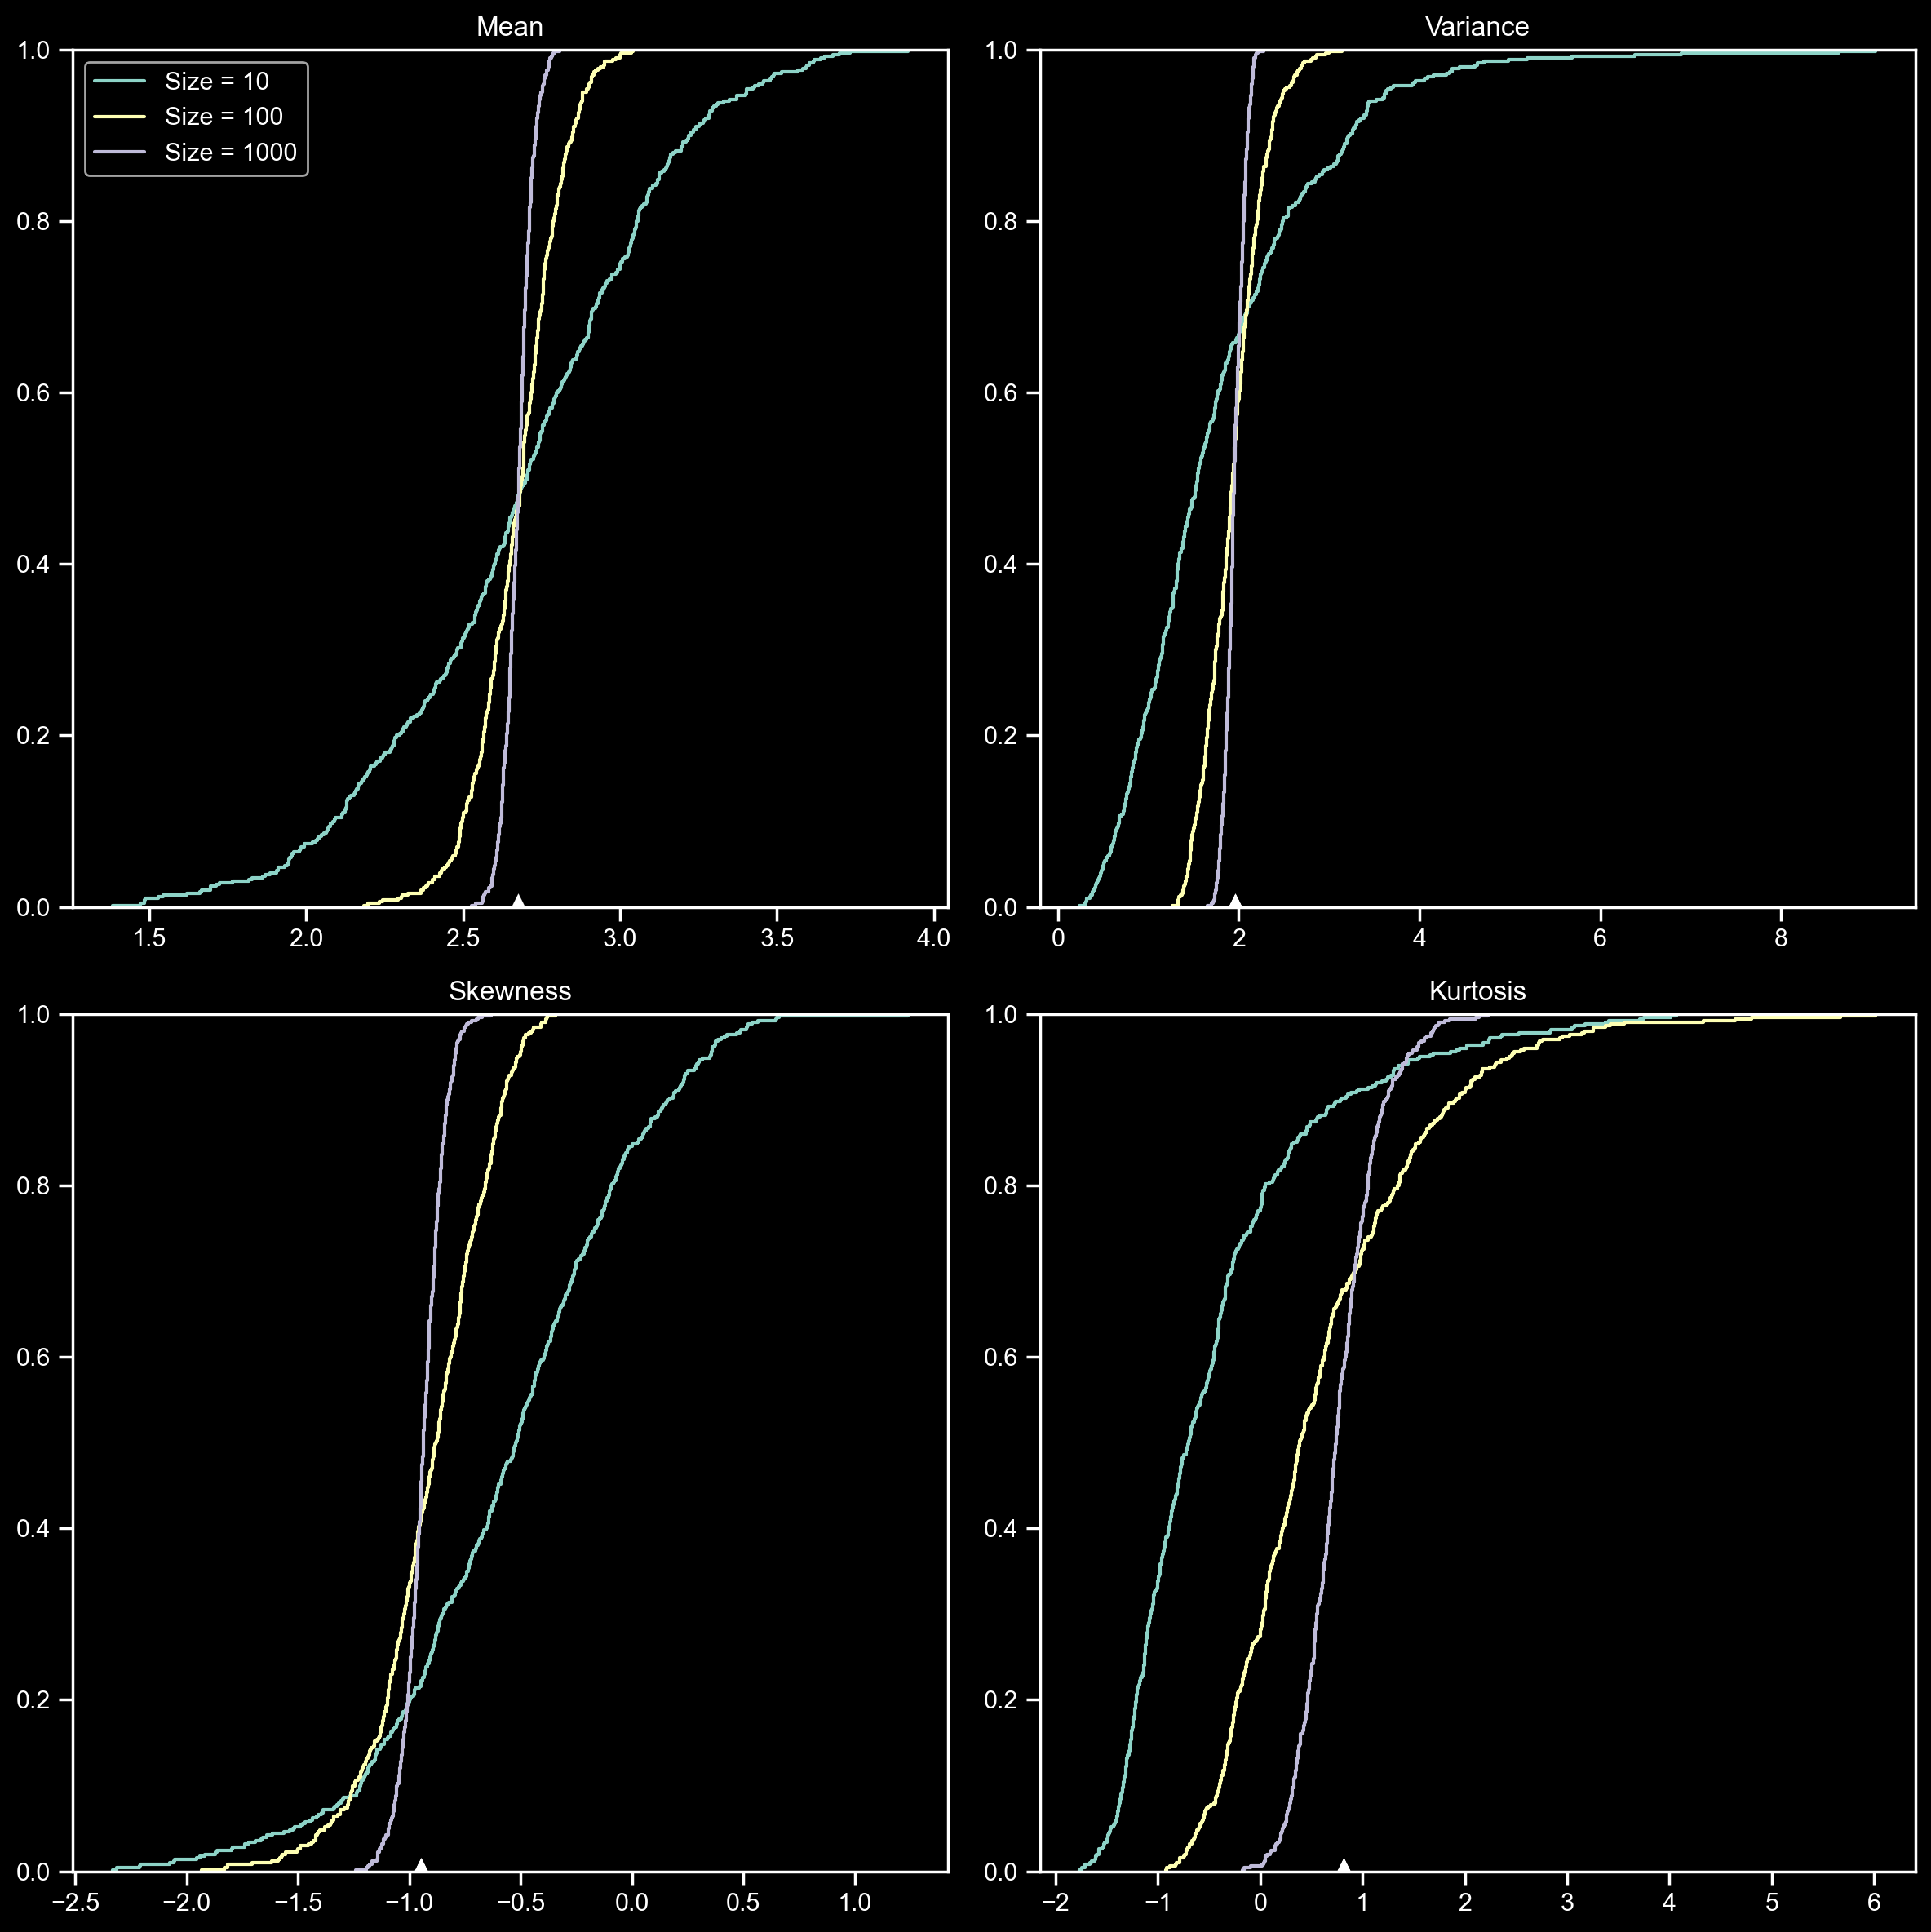

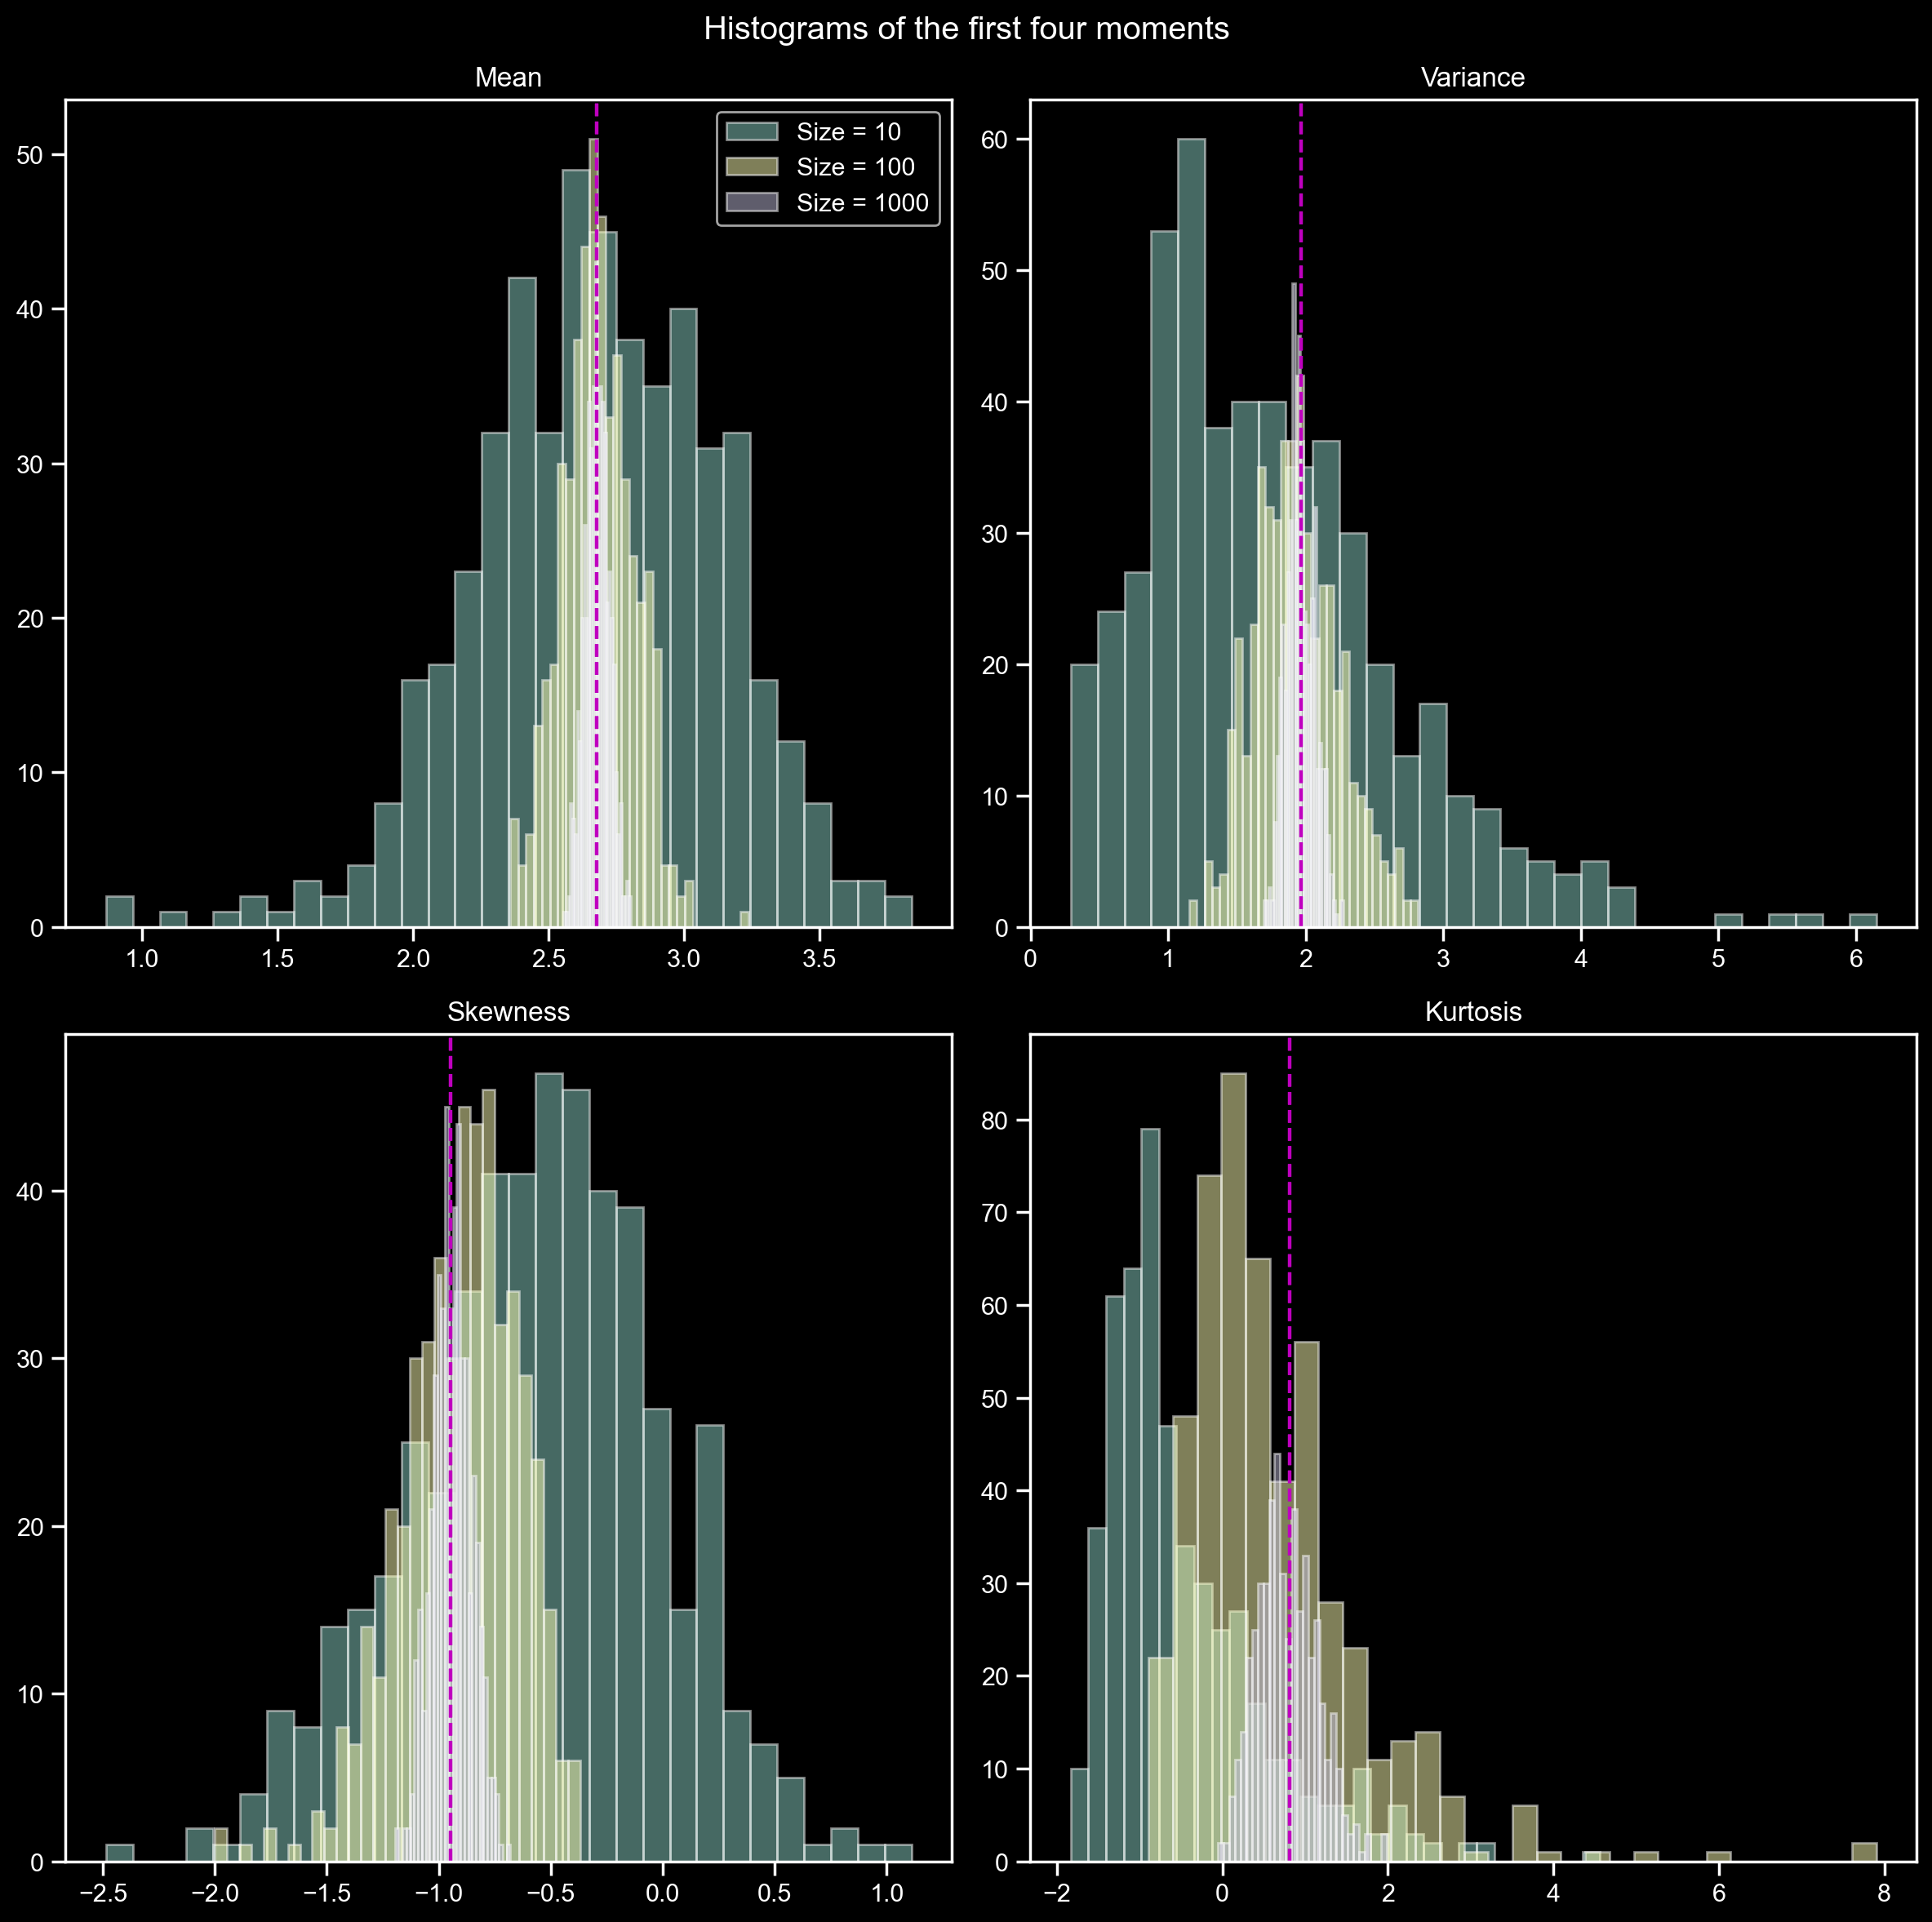

In [12]:
# for various sample sizes calculate the mean and variance of the sample
n_size = [10, 100, 1000]

fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs = axs.flatten()
for i, n in enumerate(n_size):
    rnd = sk_norm.rvs((n_size[i], 500))

    axs[0].ecdf(rnd.mean(axis=0), label=f"Size = {n}")
    axs[0].plot(true_moments[0], 0, "k^", markersize=10)
    axs[0].set_title("Mean")
    axs[0].plot(true_moments[0], 0, "k^", markersize=10, color="white")
    axs[0].legend(loc=0)

    axs[1].ecdf(rnd.var(axis=0))
    axs[1].set_title("Variance")
    axs[1].plot(true_moments[1], 0, "k^", markersize=10, color="white")

    axs[2].ecdf(stats.skew(rnd, axis=0))
    axs[2].plot(true_moments[2], 0, "k^", markersize=10, color="white")
    axs[2].set_title("Skewness")

    axs[3].ecdf(stats.kurtosis(rnd, axis=0))
    axs[3].plot(true_moments[3], 0, "k^", markersize=10, color="white")
    axs[3].set_title("Kurtosis")

fig.tight_layout()
plt.show()

# create histograms instead of the ecdf
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs = axs.flatten()
for i, n in enumerate(n_size):
    rnd = sk_norm.rvs((n_size[i], 500))

    axs[0].hist(rnd.mean(axis=0), bins=30, alpha=0.5, label=f"Size = {n}")
    axs[0].axvline(true_moments[0], color="m", linestyle="--")
    axs[0].set_title("Mean")
    axs[0].legend(loc=0)

    axs[1].hist(rnd.var(axis=0), alpha=0.5, bins=30)
    axs[1].axvline(true_moments[1], color="m", linestyle="--")
    axs[1].set_title("Variance")

    axs[2].hist(stats.skew(rnd, axis=0), alpha=0.5, bins=30)
    axs[2].axvline(true_moments[2], color="m", linestyle="--")
    axs[2].set_title("Skewness")

    axs[3].hist(stats.kurtosis(rnd, axis=0), alpha=0.5, bins=30)
    axs[3].axvline(true_moments[3], color="m", linestyle="--")
    axs[3].set_title("Kurtosis")

fig.suptitle("Histograms of the first four moments")
fig.tight_layout()

plt.show()

 Main observation here is the degree of variance in estimating the four moments as a function of sample size. Here I was able to predict the true values of the four momenets with the greater precision as the sample size increases. 
 
 Going to redo same analysis with a student's T distribution with a varying degress of freedom. 

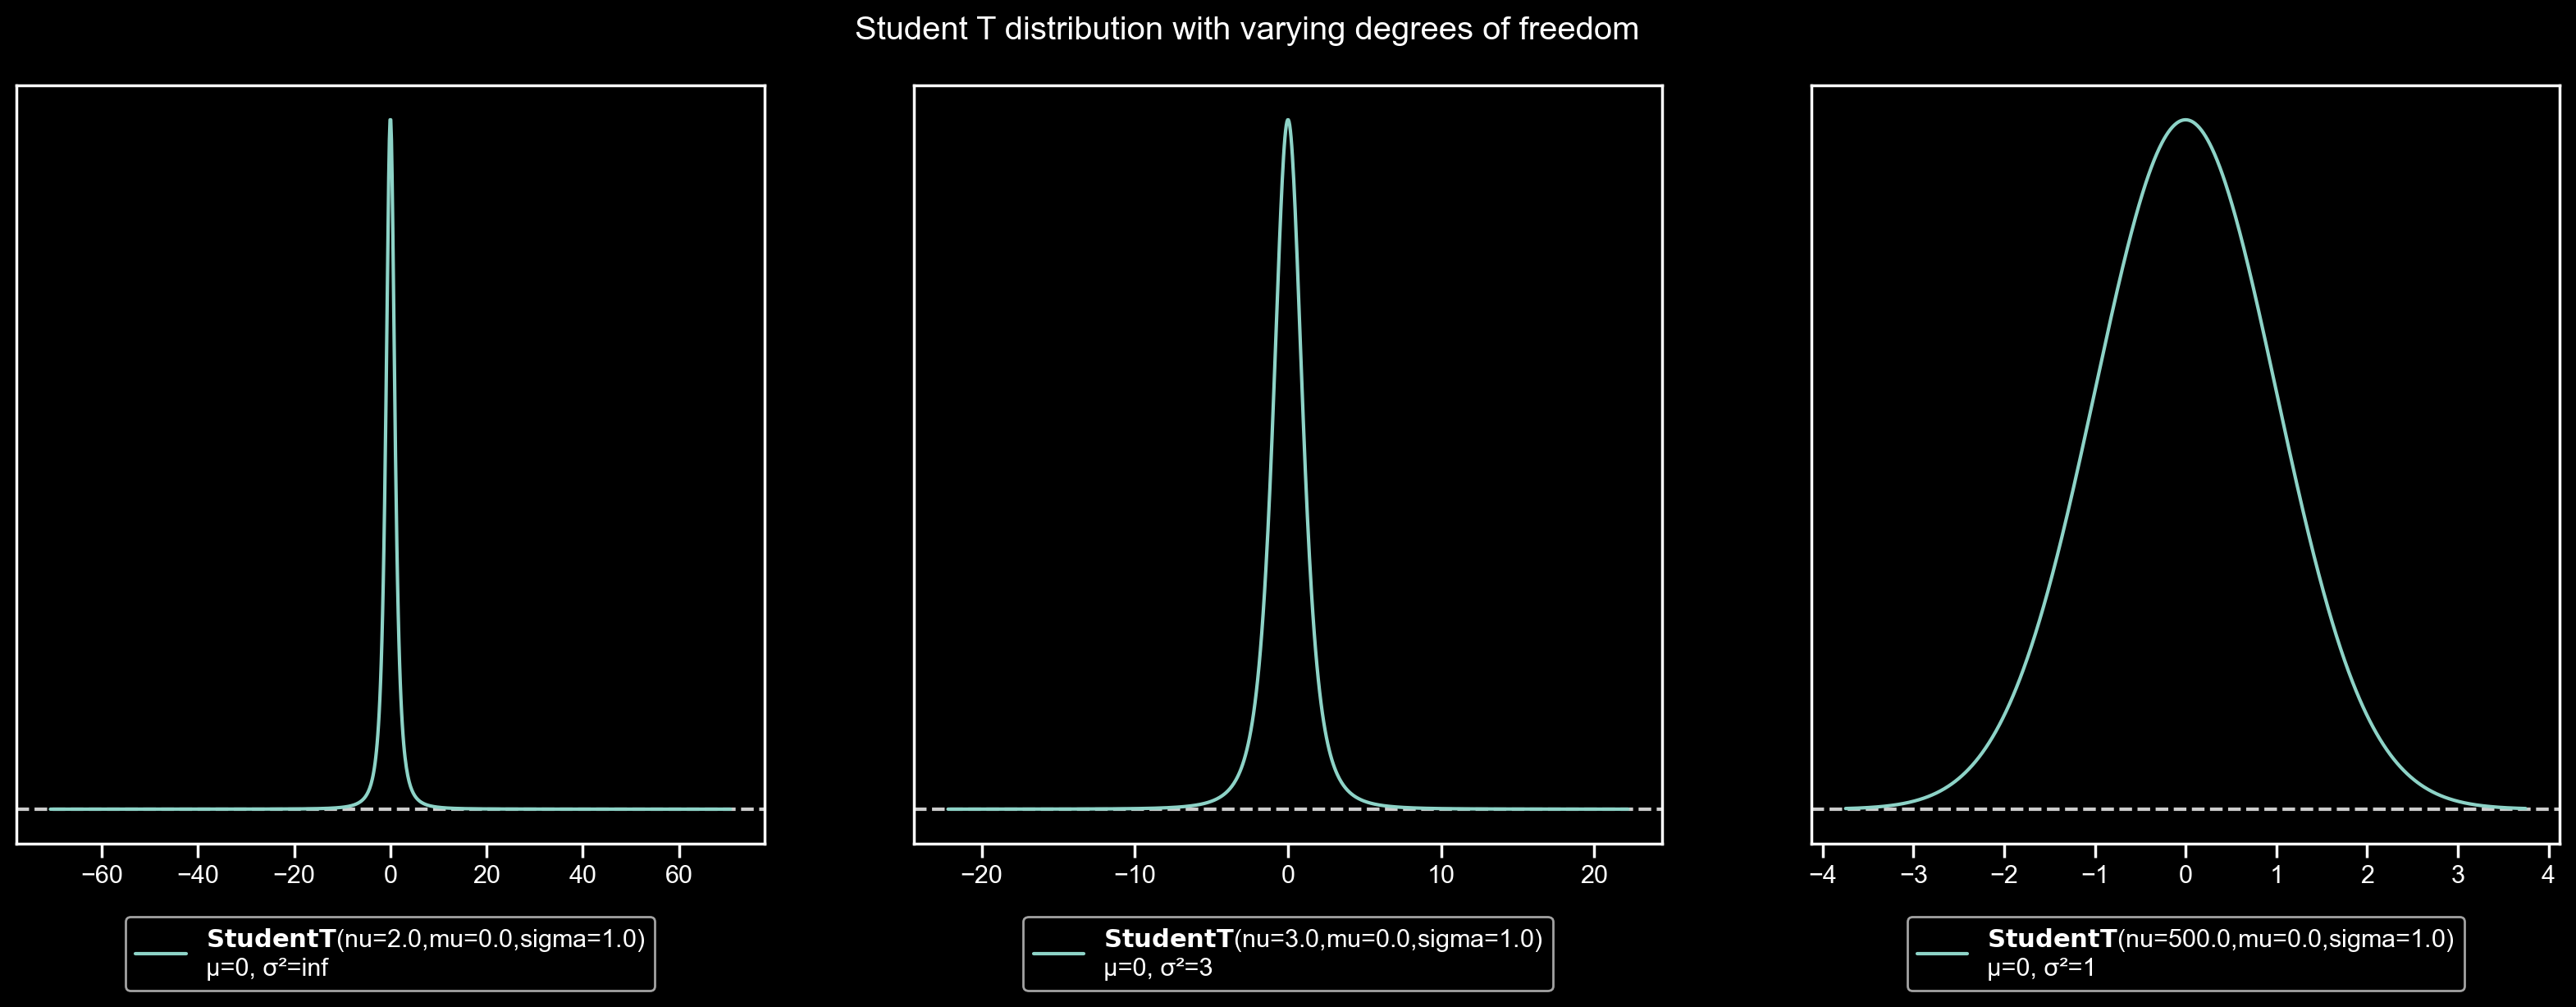

[0. 0. 0.]
[       inf 3.         1.00401606]


In [26]:
nu = [2, 3, 500]

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
for i, n in enumerate(nu):
    t_dist = pz.StudentT(n, 0, 1)
    t_dist.plot_pdf(ax=axs[i], moments=["m", "v"])
    axs[i].legend(loc="upper center", bbox_to_anchor=(0.5, -0.08))
fig.suptitle(f"Student T distribution with varying degrees of freedom", y=0.95)

plt.show()


t_means = np.zeros((len(nu)))
t_variances = np.zeros((len(nu)))
for i, n in enumerate(nu):
    t_dist = pz.StudentT(n, 0, 1)
    t_means[i], t_variances[i] = t_dist.rv_frozen.stats("mv")

print(t_means)
print(t_variances)

In [ ]:
uma_data = pd.DataFrame(
    {
        "time": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
        "dnc": [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        "hcg": [68657, 4427, 15130, 7855, 3549, 1613, 782, 676, 455, 463, 336, 382],
    }
)